<a href="https://colab.research.google.com/github/Gautami-2607/Data-Analytics-/blob/main/Intro_to_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://platform.openai.com/docs/quickstart

# 1 Setup

In [ ]:
!pip -qq install  openai 


Start for free
Start experimenting with $5 in free credit that can be used during your first 3 months.

Pay as you go
To keep things simple and flexible, pay only for the resources you use.



Get your API Key here https://platform.openai.com/account/api-keys

In [ ]:
import openai
import getpass


# Enter your OpenAI API private access key here. IMPORTANT - don't share your code online if it contains your access key or anyone will be able to access your openai account
openai.api_key = getpass.getpass("Enter your API Key...")

In [ ]:
from pprint import pprint
models = openai.Model.list()["data"]
model_ids = [model['id'] for model in models]
model_ids.sort()
model_ids

# 2 Prompting ChatGPT for Answers

## 2.1 Prompts Designing

Your prompt is essentially how you “program” the model, usually by providing some instructions or a few examples. This is different from most other NLP services which are designed for a single task, such as sentiment classification or named entity recognition. Instead, the completions and chat completions endpoint can be used for virtually any tasks like: - content generation - code generation, - summarization, - expansion, - conversation, - creative writing, - style transfer, - and more........

## 2.2 Example Prompt

In [ ]:
prompt = "Write a poem in praise of daffodils"
response = openai.Completion.create(
  model="text-davinci-003",
  prompt=prompt,
  temperature=0,
  max_tokens=100,
  top_p=1,
  frequency_penalty=0.0,
  presence_penalty=0.0)

response.choices[0]["text"]

In [ ]:
print(response.choices[0]["text"])




## 2.3 Function for Prompt Handling

In [ ]:
def get_chatGPT_completion(model="text-davinci-003", prompt=prompt, temperature=0, max_tokens=100,
                            top_p=1,  frequency_penalty=0.0,  presence_penalty=0.0):
    
    response = openai.Completion.create( model=model, prompt=prompt, temperature=temperature, max_tokens=max_tokens,
                                      top_p=top_p, frequency_penalty=frequency_penalty, presence_penalty=presence_penalty, 
                                    )
    resp = response.choices[0]["text"]
    print(resp+"\n")



In [ ]:
prompt = "Print hello world!"
resp = get_chatGPT_completion(prompt=prompt)

In [ ]:
prompt = "what is a haiku?"
get_chatGPT_completion(prompt=prompt)

In [ ]:
prompt = "Write a haiku praising egytians for building the pyramids"
get_chatGPT_completion(prompt=prompt)

In [ ]:
prompt = "What is human life expectancy in the India?"
get_chatGPT_completion(prompt=prompt)

In [ ]:
prompt = "Who was prime minister of India in 2015?"
get_chatGPT_completion(prompt=prompt)

In [ ]:
prompt = "Which party did he belong to?"
get_chatGPT_completion(prompt=prompt)

In [ ]:
prompt = "What is the square root of a banana?"
get_chatGPT_completion(prompt=prompt)

In [ ]:
prompt = "How many squigs are in a bonk?"
get_chatGPT_completion(prompt=prompt)

In [ ]:
prompt = "Write a humourous haiku"
get_chatGPT_completion(prompt=prompt)

In [ ]:
prompt = "Write a humourous limerick"
get_chatGPT_completion(prompt=prompt)

In [ ]:
prompt = "What is a limerick"
get_chatGPT_completion(prompt=prompt)

In [ ]:
prompt = "What is a limerick about pelican"
get_chatGPT_completion(prompt=prompt)

# 3 Which Models Can Handle What?

## 3.2 Pricing and options

Choose your model
Use the right model for the job. We offer a spectrum of capabilities and price points.

https://openai.com/pricing

In [ ]:
prompt = "Write a haiku praising Elvis Presley"
model_list = ["text-davinci-003", "text-davinci-002", "text-curie-001", "text-babbage-001", "text-ada-001", "gpt-3.5-turbo"]
for model in model_list[::-1]: #reversing to get the cheapest ones firs
    try:
        print(f"=====================================\nModel is {model}")
        get_chatGPT_completion(prompt=prompt,model=model)
        print("\n\n\n\n")
    except:
        print(f"{model} does not support completion")
        print("\n\n\n\n")

        pass

## 3.1 Endpoint (API) compatibility

https://platform.openai.com/docs/models/model-endpoint-compatibility

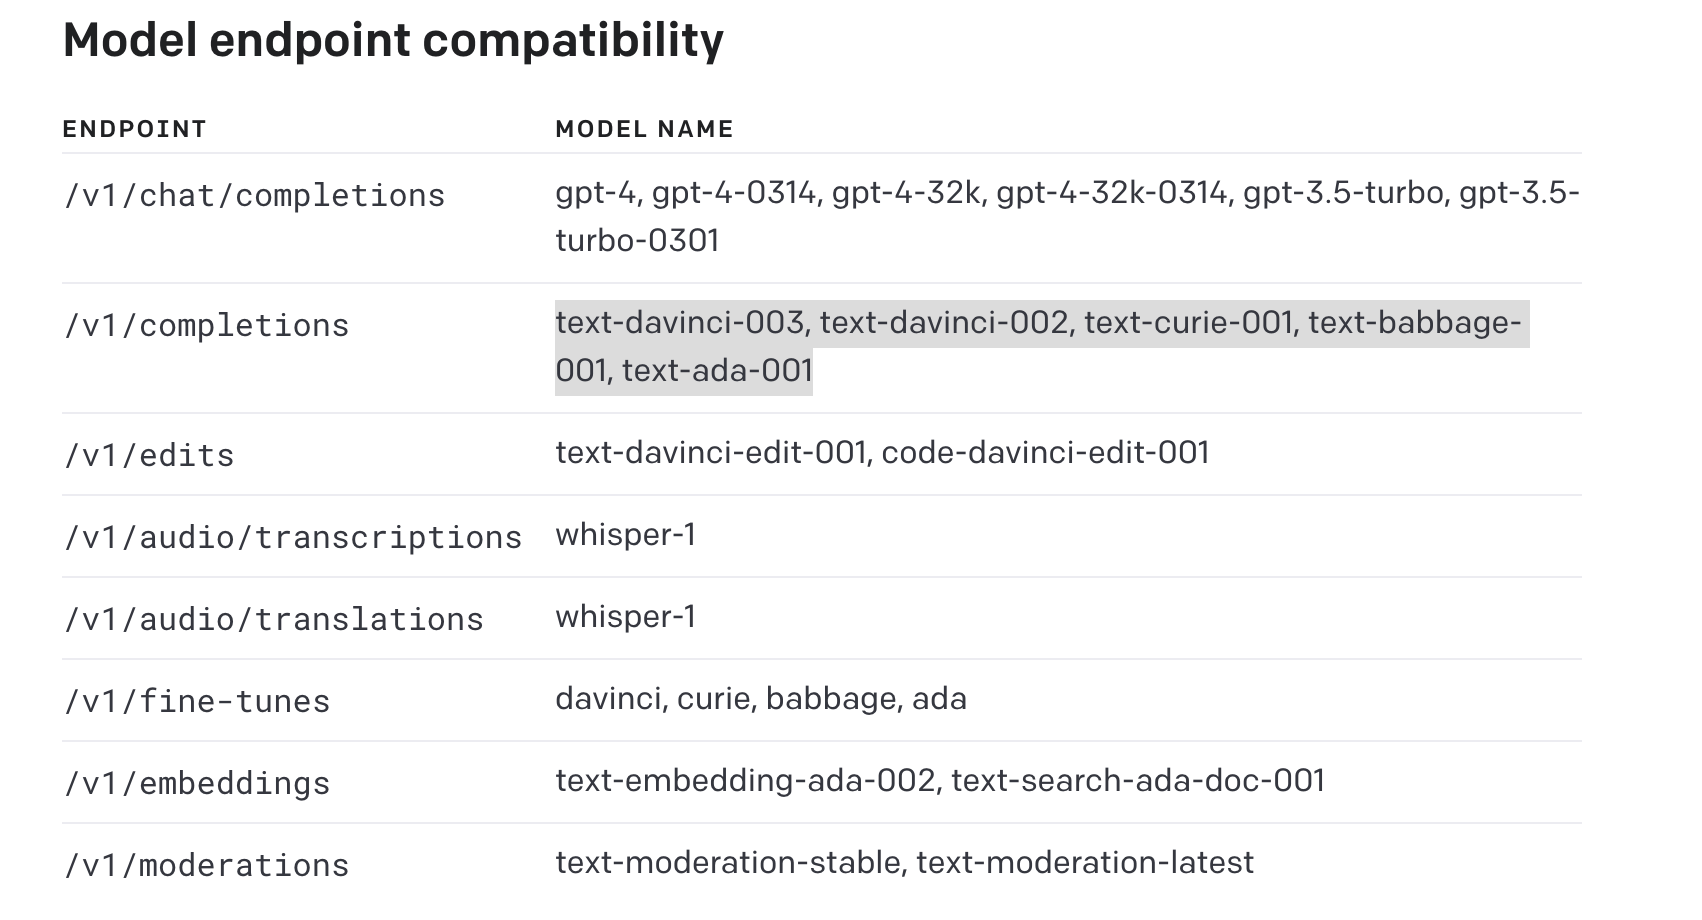

# 4 Ask Questions

In [ ]:
prompt = "Who was the president of United States in 1954?"
get_chatGPT_completion(prompt=prompt)

In [ ]:
prompt = "Who was the president of India in 1954?"
get_chatGPT_completion(prompt=prompt)

In [ ]:
prompt = "Who is the prime minister  of Britain?"
get_chatGPT_completion(prompt=prompt)

In [ ]:
prompt = "Who is the president of United States?"
get_chatGPT_completion(prompt=prompt)

In [ ]:
prompt = "Where was he born?"
get_chatGPT_completion(prompt=prompt)

# 5 Chat Completions

Given a prompt, the model will return one or more predicted completions, and can also return the probabilities of alternative tokens at each position.

## 5.1 Discontinous Chat

In [ ]:
# Note: you need to be using OpenAI Python v0.27.0 for the code below to work
import openai
model = "gpt-3.5-turbo-0301"
messages = [
        {"role": "system", "content": "You're an expert in football history"},
        {"role": "user", "content": "Where did the World Cup 2006 final take place?"}
    ] 


response = openai.ChatCompletion.create(
    model = model,
    messages=messages,
    max_tokens = 100
)

print(response["choices"][0]["message"]["content"])


In [ ]:
import openai

messages_next=[
        {"role": "system", "content": "You're an expert in football history"},
        {"role": "user", "content": "Which countries played in the final?"}
    ]

response_next = openai.ChatCompletion.create(
    model = model,
    messages=messages_next
)

print(response_next["choices"][0]["message"]["content"])

## 5.2 Chat Continuity

In [ ]:
# Note: you need to be using OpenAI Python v0.27.0 for the code below to work
import openai
model = "gpt-3.5-turbo-0301"
messages = [
        {"role": "system", "content": "You're an expert in football history"},
        {"role": "user", "content": "Where did the World Cup 2006 final take place?"}
    ] 


response = openai.ChatCompletion.create(
    model = model,
    messages=messages,
    max_tokens = 20
)

print(response["choices"][0]["message"]["content"])


In [ ]:
import pprint

messages.append({"role": "assistant", "content": response["choices"][0]["message"]["content"]})
messages.append({"role": "user", "content": "Which countries played in the final?"})

response_next = openai.ChatCompletion.create(
    model = model,
    messages=messages
)

print(response_next["choices"][0]["message"]["content"])

In [ ]:
messages

## 5.3 Sample Chat Bot

In [ ]:
class CreateBot:
    
    def __init__(self, system_prompt):
        '''
        system_prompt: [str] Describes context for Chat Assistant
        '''
        self.system = system_prompt
        self.messages = [{"role": "system", "content": system_prompt}]
        
    
    def chat(self):
        '''
        Tracks dialogue history and takes in user input
        '''
        print('To end conversation, type END')
        question = ''
        while question != 'END':
            # Get User Question
            question = input("")
            
            # Add to messages/dialogue history
            self.messages.append({'role':'user','content':question})

            #Send to ChatGPT and get response
            response = openai.ChatCompletion.create(
                  model="gpt-3.5-turbo",
                  messages=self.messages)

            # Get content of assistant reply
            content = response['choices'][0]['message']['content']
            print('\n')
            print(content)
            print('\n')
            # Add assistant reply for dialogue history
            self.messages.append({'role':'assistant','content':content})

In [ ]:
football_tutor = CreateBot(system_prompt="You are an expert in football history")
football_tutor.chat()

In [ ]:
IPL_tutor = CreateBot(system_prompt="You are an expert in IPL Indian Cricket League")
IPL_tutor.chat()

# 6 Code Generation

## 6.1 Write some python code

In [ ]:
prompt = "Write a python funciton that takes a date as input and returns the day of the week"
get_chatGPT_completion(prompt=prompt)

In [ ]:
import datetime

def get_day_of_week(date):
    day_of_week = datetime.datetime.strptime(date, '%Y-%m-%d').strftime('%A')
    return day_of_week

date = '2020-07-15'
print(get_day_of_week(date)) # Wednesday

In [ ]:
prompt = """
Write a python funciton that takes a date as input and returns the day of the week 
and write 10 test cases for it, 
make sure to handle invalid dates
"""
get_chatGPT_completion(prompt=prompt)

In [ ]:
get_chatGPT_completion(prompt=prompt,max_tokens=1000)

## 6.2 Create a Regex function

In [ ]:
dsf

## 6.3 Write some javascript code

# 7 Text Edits

Summarize

## 7.1 Spell Check

## 7.2 Grammar Check

# 8 Text Moderation

# 9 Text Embeddings

# 10 Images

## 10.1 Generate images from prompt text

In [ ]:
def chatGPT_create_image(prompt,size="1024x1024" ):
    response = openai.Image.create(
    prompt=prompt,
    n=1,
    size="1024x1024"
    )
    image_url = response['data'][0]['url']
    from skimage import io
    import matplotlib.pyplot as plt

    image = io.imread(image_url)
    plt.imshow(image)
    plt.show()

In [ ]:
chatGPT_create_image("a white tiger")

In [ ]:
chatGPT_create_image("a white tiger taking stroll on a beach")

In [ ]:
chatGPT_create_image("a white tiger taking stroll on a beach with a seagul on its back")

In [ ]:
chatGPT_create_image("a white tiger galloping on a beach with a seagul riding on its back")

In [ ]:
chatGPT_create_image("a white tiger galloping on a beach chasing a dear")

In [ ]:
chatGPT_create_image("a white tiger galloping on a beach chasing a deer")

## 10.2 Generate Images from other Images

https://www.makeuseof.com/generate-images-using-openai-api-dalle-python/



# 11 Audio

## 11.1 Trascriptions

## 11.2 Translations

# 12 Generate video using prompts